In [120]:
import sys
sys.path.insert(0,'C:\\Coding\\Local_repositories\\Exammmmm\\')

import pandas as pd
import matplotlib.pyplot as plt

# Optimizing portfolios

In [121]:
# Load data

asset = {}

for i in range(1, 11):
    asset[i] = pd.read_csv("C:\\Coding\\Local_repositories\\Exammmmm\\ExamData\\asset_{}.csv".format(i), index_col = 0).transpose()

In [122]:
# Linear and cumulative returns

lin_ret = {}
cum_lin_ret = {}

for i in range(1, 11):
    lin_ret[i] = asset[i][:] / asset[i][:].shift(1) - 1
    cum_lin_ret[i] = (lin_ret[i] + 1).cumprod() - 1

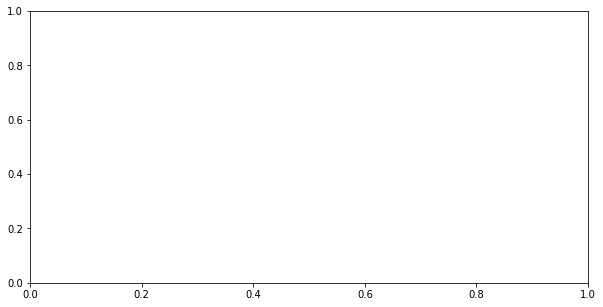

In [123]:
fig, ax = plt.subplots(figsize = (10, 5))
